In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.linear_model import LinearRegression


In [2]:
df_games = pd.read_csv('./data/games_c4.csv')
df_games = df_games.iloc[:, 1:]
df_games.head()

,QueryName,DeveloperCount,Unnamed: 11,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Unnamed: 20,Unnamed: 21,Unnamed: 23,...,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales
0,Counter-Strike,1,NaN,68991,1,13033334,9140731,NaN,NaN,NaN,...,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...",96.0,149589.0,95.0,908.0,97.458003,236979.0,0.974580,-5.349292,1.302030e+08
1,Team Fortress Classic,1,NaN,2439,1,5399140,753627,NaN,NaN,NaN,...,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277...",86.0,6045.0,89.0,64.0,86.873772,8144.0,0.868738,-3.779629,2.694171e+07
2,Day of Defeat,1,NaN,2319,1,7621102,1709740,NaN,NaN,NaN,...,"{'FPS': 798, 'World War II': 270, 'Multiplayer...",87.0,4038.0,97.0,36.0,90.150843,6762.0,0.901508,-3.731648,3.802930e+07
3,Deathmatch Classic,1,NaN,888,1,7498965,789676,NaN,NaN,NaN,...,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M...",81.0,2120.0,95.0,21.0,82.588076,2952.0,0.825881,-3.296144,3.741984e+07
4,Half-Life: Opposing Force,1,NaN,2934,1,5399499,705741,NaN,NaN,NaN,...,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S...",95.0,18994.0,95.0,269.0,95.188645,22052.0,0.951886,-4.295354,2.694350e+07


In [3]:
df_Player = pd.read_csv('./data/avg_play.csv')
df_games = pd.read_csv('./data/games_c4.csv')
df_games = pd.merge(df_games ,df_Player ,how='left',on='AppID')
df_games

,AppID,QueryName,DeveloperCount,Unnamed: 11,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Unnamed: 20,Unnamed: 21,...,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales,avg_playtime
0,10,Counter-Strike,1,NaN,68991,1,13033334,9140731,NaN,NaN,...,96.0,149589.0,95.0,908.0,97.458003,236979.0,0.974580,-5.349292,1.302030e+08,251.824891
1,20,Team Fortress Classic,1,NaN,2439,1,5399140,753627,NaN,NaN,...,86.0,6045.0,89.0,64.0,86.873772,8144.0,0.868738,-3.779629,2.694171e+07,21.889187
2,30,Day of Defeat,1,NaN,2319,1,7621102,1709740,NaN,NaN,...,87.0,4038.0,97.0,36.0,90.150843,6762.0,0.901508,-3.731648,3.802930e+07,29.972090
3,40,Deathmatch Classic,1,NaN,888,1,7498965,789676,NaN,NaN,...,81.0,2120.0,95.0,21.0,82.588076,2952.0,0.825881,-3.296144,3.741984e+07,15.260961
4,50,Half-Life: Opposing Force,1,NaN,2934,1,5399499,705741,NaN,NaN,...,95.0,18994.0,95.0,269.0,95.188645,22052.0,0.951886,-4.295354,2.694350e+07,5.748227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298,567660,Baseball Riot,1,NaN,0,1,0,0,NaN,NaN,...,80.0,10.0,-1.0,-1.0,70.000000,30.0,0.700000,-1.191362,0.000000e+00,4.236905
13299,567860,Passage 4,1,NaN,0,1,0,0,NaN,NaN,...,93.0,16.0,-1.0,-1.0,95.454545,22.0,0.954545,-1.316273,0.000000e+00,NaN
13300,567940,Piximalism,1,NaN,0,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13301,568150,Technoball,1,NaN,0,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_games.columns

Index(['AppID', 'QueryName', 'DeveloperCount', 'Unnamed: 11',
       'RecommendationCount', 'PublisherCount', 'SteamSpyOwners',
       'SteamSpyPlayersEstimate', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 23',
       'PurchaseAvail', 'Unnamed: 25', 'PlatformWindows',
       'CategorySinglePlayer', 'GenreIsAction', 'GenreIsAdventure',
       'GenreIsCasual', 'PriceCurrency', 'ShortDescrip', 'DetailedDescrip',
       'PCMinReqsText', 'Release date', 'DLC count', 'Windows',
       'Metacritic score', 'Achievements', 'Recommendations', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Year', 'Month', 'Day',
       'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play', 'Action',
       'Strategy', 'Simulation', 'Racing', 'Sports', 'Massively Multiplayer',
       'Education', 'Violent', 'Design & Illustration', 'Animation & Modeling',
       'Co-op', 'Cross-Platform Multiplayer', 'Family Sharing',
       'HDR available', 'In-App Purchases', 'Multi-player', 'Online PvP',
       'PvP', 

In [5]:
df_games= df_games.drop(columns=[
    'AppID',
    'Unnamed: 11', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
    'developers',  # Developer related columns
    'Publishers', 'publishers',  # Publisher related columns
    'PriceCurrency',  # Price related
    'Recommendations',  # Reviews and ratings
    'DLC count',  # Redundant DLC count
    'Categories',  # Redundant category
    'Single-player',  # Redundant category
    'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',  # Specific genres
    'PlatformWindows', 'ShortDescrip', 'DetailedDescrip',
    'PCMinReqsText', 'Windows', 'Genres', 'Day',
    # 'Cross-Platform', 'Multiplayer',
    'Online PvP', 'PvP', 'VR Supported', 'about_the_game', 'packages', 'categories',
    'tags', 'pct_pos_total', 'pct_pos_recent', 'num_reviews_recent', 'CustomRating',
    'Metacritic score',
    'num_reviews_total'
])

In [6]:
df_games.columns

Index(['QueryName', 'DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'PurchaseAvail',
       'CategorySinglePlayer', 'Release date', 'Achievements', 'Developers',
       'Year', 'Month', 'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play',
       'Action', 'Strategy', 'Simulation', 'Racing', 'Sports',
       'Massively Multiplayer', 'Education', 'Violent',
       'Design & Illustration', 'Animation & Modeling', 'Co-op',
       'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available',
       'In-App Purchases', 'Multi-player', 'VR Support', 'age_ranking',
       'Price', 'dlc_count', 'genres', 'positive', 'negative', 'rating',
       'TotalReviews', 'ReviewScore', 'Sales', 'avg_playtime'],
      dtype='object')

In [7]:
df_games= df_games.dropna()

In [8]:
len(df_games)

9188

In [9]:
df_games.iloc[:,20:].info()


<class 'pandas.core.frame.DataFrame'>
Index: 9188 entries, 0 to 13302
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Simulation                  9188 non-null   float64
 1   Racing                      9188 non-null   float64
 2   Sports                      9188 non-null   float64
 3   Massively Multiplayer       9188 non-null   float64
 4   Education                   9188 non-null   float64
 5   Violent                     9188 non-null   float64
 6   Design & Illustration       9188 non-null   float64
 7   Animation & Modeling        9188 non-null   float64
 8   Co-op                       9188 non-null   float64
 9   Cross-Platform Multiplayer  9188 non-null   float64
 10  Family Sharing              9188 non-null   float64
 11  HDR available               9188 non-null   float64
 12  In-App Purchases            9188 non-null   float64
 13  Multi-player                9188 non-

# Data Cleaning

## Zero replacement

In [10]:
zero_columns = ['Achievements', 'Price', 'dlc_count'] + list(df_games.iloc[:, 10:32].columns)

df_games[zero_columns] = df_games[zero_columns].fillna(0)

## Most Frequent

In [11]:
import numpy as np
from datetime import datetime

# Assuming df_games is the dataset, current year for calculating year difference
current_year = datetime.now().year

# Fill 'Year' with the most frequent year and calculate (current_year - Year)
most_frequent_year = df_games['Year'].mode()[0]
df_games['Year'] = df_games['Year'].fillna(most_frequent_year)
df_games['YearDifference'] = current_year - df_games['Year']

# Fill 'Month' with the most frequent month and create sin and cos transformations
most_frequent_month = df_games['Month'].mode()[0]
df_games['Month'] = df_games['Month'].fillna(most_frequent_month)

# Creating sin and cos transformations for cyclical month representation
df_games['Month_sin'] = np.sin(2 * np.pi * df_games['Month'] / 12)
df_games['Month_cos'] = np.cos(2 * np.pi * df_games['Month'] / 12)

df_games.drop(columns=['Year', 'Month'], inplace=True)


## Average

In [12]:
imp_mean = SimpleImputer(strategy='mean')
mean_feats = ['age_ranking', 'rating', 'ReviewScore']

df_games[mean_feats] = imp_mean.fit_transform(df_games[mean_feats])

df_games.head()

,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,CategorySinglePlayer,Release date,Achievements,...,positive,negative,rating,TotalReviews,ReviewScore,Sales,avg_playtime,YearDifference,Month_sin,Month_cos
0,Counter-Strike,1,68991,1,13033334,9140731,True,False,2000-11-01,0.0,...,230955.0,6024.0,97.458003,236979.0,0.974580,1.302030e+08,251.824891,24.0,-5.000000e-01,0.866025
1,Team Fortress Classic,1,2439,1,5399140,753627,True,False,1999-04-01,0.0,...,7075.0,1069.0,86.873772,8144.0,0.868738,2.694171e+07,21.889187,25.0,8.660254e-01,-0.500000
2,Day of Defeat,1,2319,1,7621102,1709740,True,False,2003-05-01,0.0,...,6096.0,666.0,90.150843,6762.0,0.901508,3.802930e+07,29.972090,21.0,5.000000e-01,-0.866025
3,Deathmatch Classic,1,888,1,7498965,789676,True,False,2001-06-01,0.0,...,2438.0,514.0,82.588076,2952.0,0.825881,3.741984e+07,15.260961,23.0,1.224647e-16,-1.000000
4,Half-Life: Opposing Force,1,2934,1,5399499,705741,True,True,1999-11-01,0.0,...,20991.0,1061.0,95.188645,22052.0,0.951886,2.694350e+07,5.748227,25.0,-5.000000e-01,0.866025


## Median

In [13]:
imp_median = SimpleImputer(strategy='median')

median_feats = ['TotalReviews', 'positive', 'negative']

df_games[median_feats] = imp_median.fit_transform(df_games[median_feats])

## Balance (positive x negative)

In [14]:
df_games['balance_pos_neg'] = df_games['positive'] - df_games['negative']

df_games.drop(columns=['positive', 'negative'], inplace=True)

# Preprocessing

Replace the null values

Achievements -> equal to 0 - ok

Year -> most frequent and (This year - year) - ok

Month -> most frequent and sin and cos - ok

Columns 10:31 -> replace with zero - ok

age_ranking: most frequent and OHE - ok

Price -> equal to 0 and scaler - ok

dlc_count -> equal to 0 and scaler - ok

positive and negative -> balance between then and scaler

rating -> average and scaler

TotalReviews -> median and scaler

ReviewScore -> average and scaler

In [15]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9188 entries, 0 to 13302
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   QueryName                   9188 non-null   object 
 1   DeveloperCount              9188 non-null   int64  
 2   RecommendationCount         9188 non-null   int64  
 3   PublisherCount              9188 non-null   int64  
 4   SteamSpyOwners              9188 non-null   int64  
 5   SteamSpyPlayersEstimate     9188 non-null   int64  
 6   PurchaseAvail               9188 non-null   bool   
 7   CategorySinglePlayer        9188 non-null   bool   
 8   Release date                9188 non-null   object 
 9   Achievements                9188 non-null   float64
 10  Developers                  9188 non-null   object 
 11  Adventure                   9188 non-null   float64
 12  Casual                      9188 non-null   float64
 13  Indie                       9188 non-

## One Hot Encoder

In [16]:
# enc_bool = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

# enc_bool.fit(df_games[['PurchaseAvail', 'CategorySinglePlayer']])

# encoded_df = pd.DataFrame(enc_bool.transform(
#     df_games[['PurchaseAvail', 'CategorySinglePlayer']]).toarray(),
#     columns=enc_bool.get_feature_names_out(['PurchaseAvail', 'CategorySinglePlayer'])
# )

# encoded_df.index = df_games.index

# df_games = df_games.drop(['PurchaseAvail', 'CategorySinglePlayer'], axis=1)
# df_games = pd.concat([df_games, encoded_df], axis=1)
# df_games.rename(columns={'PurchaseAvail_True':'PurchaseAvail', 'CategorySinglePlayer_True':'CategorySinglePlayer'},
#                 inplace=True)

add budget category

In [17]:
# Function to categorize budget based on Sales, team size, achievements, multiplayer, and playtime
def categorize_budget(row):
    # Assuming playtime is in minutes
    if (row['Sales'] > 50_000_000
         ):
        return 'AAA'
    elif (10_000_000 <= row['Sales'] <= 50_000_000
           ):  # 10 minutes
        return 'AA'
    else:
        return 'Indie'

# Apply the categorization function
df_games['BudgetCategory'] = df_games.apply(categorize_budget, axis=1)

# Check if avg_playtime is in hours, convert to minutes if needed (future adjustment)
# df_games['avg_playtime'] = df_games['avg_playtime'] * 60  # Uncomment this if later you confirm it's in hours


In [18]:
df_games.head()

,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,CategorySinglePlayer,Release date,Achievements,...,rating,TotalReviews,ReviewScore,Sales,avg_playtime,YearDifference,Month_sin,Month_cos,balance_pos_neg,BudgetCategory
0,Counter-Strike,1,68991,1,13033334,9140731,True,False,2000-11-01,0.0,...,97.458003,236979.0,0.974580,1.302030e+08,251.824891,24.0,-5.000000e-01,0.866025,224931.0,AAA
1,Team Fortress Classic,1,2439,1,5399140,753627,True,False,1999-04-01,0.0,...,86.873772,8144.0,0.868738,2.694171e+07,21.889187,25.0,8.660254e-01,-0.500000,6006.0,AA
2,Day of Defeat,1,2319,1,7621102,1709740,True,False,2003-05-01,0.0,...,90.150843,6762.0,0.901508,3.802930e+07,29.972090,21.0,5.000000e-01,-0.866025,5430.0,AA
3,Deathmatch Classic,1,888,1,7498965,789676,True,False,2001-06-01,0.0,...,82.588076,2952.0,0.825881,3.741984e+07,15.260961,23.0,1.224647e-16,-1.000000,1924.0,AA
4,Half-Life: Opposing Force,1,2934,1,5399499,705741,True,True,1999-11-01,0.0,...,95.188645,22052.0,0.951886,2.694350e+07,5.748227,25.0,-5.000000e-01,0.866025,19930.0,AA


In [19]:
df_games['BudgetCategory'].value_counts()

BudgetCategory
Indie    8881
AA        243
AAA        64
Name: count, dtype: int64

In [20]:
# One-hot encoding the 'BudgetCategory' column
df_games = pd.get_dummies(df_games, columns=['BudgetCategory'], prefix='Budget')

# This will create three new columns: 'Budget_Indie', 'Budget_AA', and 'Budget_AAA',
# with binary values indicating the presence of each category


## Scaler

In [21]:
# # Price
# # dlc_count
# # balance_pos_neg
# # rating
# # TotalReviews
# # ReviewScore
# #avg_playtime


# scaling_feat = [
#     'DeveloperCount',
#     'RecommendationCount',
#     'PublisherCount',
#     'SteamSpyOwners',
#     'SteamSpyPlayersEstimate',
#     'Achievements',
#     'Price',
#     'dlc_count',
#     'balance_pos_neg',
#     'rating',
#     'TotalReviews',
#     'ReviewScore',
#     'avg_playtime']

# fig, axs = plt.subplots(5, 3, figsize=(15, 10))

# axes = axs.flatten()

# for ax, f in zip(axes, scaling_feat):
#     sns.histplot(data=df_games, x=f, ax=ax, bins=50)

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()
# # df_games[scaling_feat]

In [22]:
# df_games[scaling_feat].describe()

In [23]:
# الون هوت 
# rob_feat = ['DeveloperCount',
#     'RecommendationCount',
#     'PublisherCount',
#     'SteamSpyOwners',
#     'SteamSpyPlayersEstimate',
#     'Achievements',
#     'Price',
#     'dlc_count',
#     'balance_pos_neg',
#     'TotalReviews',
#     'avg_playtime']

# std_feat = ['rating', 'ReviewScore']

# rob = RobustScaler()

# std = StandardScaler()

# df_games[rob_feat] = rob.fit_transform(df_games[rob_feat])
# df_games[std_feat] = std.fit_transform(df_games[std_feat])

In [24]:
df_games.columns

Index(['QueryName', 'DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'PurchaseAvail',
       'CategorySinglePlayer', 'Release date', 'Achievements', 'Developers',
       'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play', 'Action',
       'Strategy', 'Simulation', 'Racing', 'Sports', 'Massively Multiplayer',
       'Education', 'Violent', 'Design & Illustration', 'Animation & Modeling',
       'Co-op', 'Cross-Platform Multiplayer', 'Family Sharing',
       'HDR available', 'In-App Purchases', 'Multi-player', 'VR Support',
       'age_ranking', 'Price', 'dlc_count', 'genres', 'rating', 'TotalReviews',
       'ReviewScore', 'Sales', 'avg_playtime', 'YearDifference', 'Month_sin',
       'Month_cos', 'balance_pos_neg', 'Budget_AA', 'Budget_AAA',
       'Budget_Indie'],
      dtype='object')

In [25]:
#df_games[['num_reviews_total', 'TotalReviews']]

In [26]:
    #from sklearn.preprocessing import MinMaxScaler


    # Step 3: Scaling for 'positive' and 'negative'
    #scaler = MinMaxScaler()
    #df_games[['positive', 'negative']] = scaler.fit_transform(df_games[['positive', 'negative']])

    # Step 4: Fill missing values for 'rating', 'TotalReviews', and 'ReviewScore', then apply scaling
 #   df_games['rating'] = df_games['rating'].fillna(df_games['rating'].mean())
  #  df_games['TotalReviews'] = df_games['TotalReviews'].fillna(df_games['TotalReviews'].median())
   # df_games['ReviewScore'] = df_games['ReviewScore'].fillna(df_games['ReviewScore'].mean())

    # Scaling for rating, TotalReviews, and ReviewScore
    #df_games[['rating', 'TotalReviews', 'ReviewScore']] = scaler.fit_transform(df_games[['rating', 'TotalReviews', 'ReviewScore']])

    # Display a summary of the updated dataframe to confirm changes
    #df_games[['positive', 'negative', 'rating', 'TotalReviews', 'ReviewScore']].head()


In [27]:
df_games.iloc[:,:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9188 entries, 0 to 13302
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   QueryName                   9188 non-null   object 
 1   DeveloperCount              9188 non-null   int64  
 2   RecommendationCount         9188 non-null   int64  
 3   PublisherCount              9188 non-null   int64  
 4   SteamSpyOwners              9188 non-null   int64  
 5   SteamSpyPlayersEstimate     9188 non-null   int64  
 6   PurchaseAvail               9188 non-null   bool   
 7   CategorySinglePlayer        9188 non-null   bool   
 8   Release date                9188 non-null   object 
 9   Achievements                9188 non-null   float64
 10  Developers                  9188 non-null   object 
 11  Adventure                   9188 non-null   float64
 12  Casual                      9188 non-null   float64
 13  Indie                       9188 non-

In [28]:
df_games.columns

Index(['QueryName', 'DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'PurchaseAvail',
       'CategorySinglePlayer', 'Release date', 'Achievements', 'Developers',
       'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play', 'Action',
       'Strategy', 'Simulation', 'Racing', 'Sports', 'Massively Multiplayer',
       'Education', 'Violent', 'Design & Illustration', 'Animation & Modeling',
       'Co-op', 'Cross-Platform Multiplayer', 'Family Sharing',
       'HDR available', 'In-App Purchases', 'Multi-player', 'VR Support',
       'age_ranking', 'Price', 'dlc_count', 'genres', 'rating', 'TotalReviews',
       'ReviewScore', 'Sales', 'avg_playtime', 'YearDifference', 'Month_sin',
       'Month_cos', 'balance_pos_neg', 'Budget_AA', 'Budget_AAA',
       'Budget_Indie'],
      dtype='object')

In [29]:
#df_games.to_csv("dfGames.csv")

In [30]:
#temp_df_games= df_games.copy()

In [31]:
#df_bool = temp_df_games[['Adventure','Casual','Indie','RPG','Free To Play','Action','Strategy','Simulation',
   # 'Racing','Sports','Massively Multiplayer','Education','Violent','Design & Illustration',
  #  'Animation & Modeling','Co-op','Cross-Platform Multiplayer','Family Sharing','HDR available',
 #   'In-App Purchases','Multi-player','VR Support']]
#to_cinv = df_bool.columns.to_list()
#df_bool = temp_df_games[to_cinv].astype(bool)
#temp_df_games[to_cinv] = df_bool

In [32]:
#df_games['BudgetCategory'].value_counts()

In [33]:
#df_games.to_csv("games_newest2.csv")

In [34]:
# df_games.to_csv("games_Last.csv")

In [35]:
df_games

,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,CategorySinglePlayer,Release date,Achievements,...,ReviewScore,Sales,avg_playtime,YearDifference,Month_sin,Month_cos,balance_pos_neg,Budget_AA,Budget_AAA,Budget_Indie
0,Counter-Strike,1,68991,1,13033334,9140731,True,False,2000-11-01,0.0,...,0.974580,1.302030e+08,251.824891,24.0,-5.000000e-01,0.866025,224931.0,False,True,False
1,Team Fortress Classic,1,2439,1,5399140,753627,True,False,1999-04-01,0.0,...,0.868738,2.694171e+07,21.889187,25.0,8.660254e-01,-0.500000,6006.0,True,False,False
2,Day of Defeat,1,2319,1,7621102,1709740,True,False,2003-05-01,0.0,...,0.901508,3.802930e+07,29.972090,21.0,5.000000e-01,-0.866025,5430.0,True,False,False
3,Deathmatch Classic,1,888,1,7498965,789676,True,False,2001-06-01,0.0,...,0.825881,3.741984e+07,15.260961,23.0,1.224647e-16,-1.000000,1924.0,True,False,False
4,Half-Life: Opposing Force,1,2934,1,5399499,705741,True,True,1999-11-01,0.0,...,0.951886,2.694350e+07,5.748227,25.0,-5.000000e-01,0.866025,19930.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13292,"Minions, Monsters, and Madness",2,0,1,0,0,False,True,2017-01-10,0.0,...,0.666667,0.000000e+00,2.433333,7.0,5.000000e-01,0.866025,2.0,False,False,True
13295,The Jigsaw Puzzle Room,1,0,1,0,0,True,True,2016-12-08,0.0,...,0.600000,0.000000e+00,0.000000,8.0,-2.449294e-16,1.000000,1.0,False,False,True
13297,TILE,1,0,1,0,0,True,True,2016-12-09,0.0,...,0.266667,0.000000e+00,0.305952,8.0,-2.449294e-16,1.000000,-14.0,False,False,True
13298,Baseball Riot,1,0,1,0,0,False,True,2017-01-17,16.0,...,0.700000,0.000000e+00,4.236905,7.0,5.000000e-01,0.866025,12.0,False,False,True


# EDA

In [36]:
df_games

,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,CategorySinglePlayer,Release date,Achievements,...,ReviewScore,Sales,avg_playtime,YearDifference,Month_sin,Month_cos,balance_pos_neg,Budget_AA,Budget_AAA,Budget_Indie
0,Counter-Strike,1,68991,1,13033334,9140731,True,False,2000-11-01,0.0,...,0.974580,1.302030e+08,251.824891,24.0,-5.000000e-01,0.866025,224931.0,False,True,False
1,Team Fortress Classic,1,2439,1,5399140,753627,True,False,1999-04-01,0.0,...,0.868738,2.694171e+07,21.889187,25.0,8.660254e-01,-0.500000,6006.0,True,False,False
2,Day of Defeat,1,2319,1,7621102,1709740,True,False,2003-05-01,0.0,...,0.901508,3.802930e+07,29.972090,21.0,5.000000e-01,-0.866025,5430.0,True,False,False
3,Deathmatch Classic,1,888,1,7498965,789676,True,False,2001-06-01,0.0,...,0.825881,3.741984e+07,15.260961,23.0,1.224647e-16,-1.000000,1924.0,True,False,False
4,Half-Life: Opposing Force,1,2934,1,5399499,705741,True,True,1999-11-01,0.0,...,0.951886,2.694350e+07,5.748227,25.0,-5.000000e-01,0.866025,19930.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13292,"Minions, Monsters, and Madness",2,0,1,0,0,False,True,2017-01-10,0.0,...,0.666667,0.000000e+00,2.433333,7.0,5.000000e-01,0.866025,2.0,False,False,True
13295,The Jigsaw Puzzle Room,1,0,1,0,0,True,True,2016-12-08,0.0,...,0.600000,0.000000e+00,0.000000,8.0,-2.449294e-16,1.000000,1.0,False,False,True
13297,TILE,1,0,1,0,0,True,True,2016-12-09,0.0,...,0.266667,0.000000e+00,0.305952,8.0,-2.449294e-16,1.000000,-14.0,False,False,True
13298,Baseball Riot,1,0,1,0,0,False,True,2017-01-17,16.0,...,0.700000,0.000000e+00,4.236905,7.0,5.000000e-01,0.866025,12.0,False,False,True


In [37]:
import altair as alt

In [38]:
games = df_games[df_games['Sales'] > 100]

games_sorted = games.sort_values(by=['age_ranking', 'Sales'], ascending=[True, False])

top_5_per_age = games_sorted.groupby('age_ranking').head(5).reset_index()
best_sales_chart = alt.Chart(top_5_per_age).mark_bar().encode(
    x=alt.X('Sales:Q', title='Sales'),
    y=alt.Y('QueryName:N', sort='-x', title='Game Name'),
    color='age_ranking:O',
    tooltip=['age_ranking', 'QueryName', 'Sales']
).properties(
    width=800,
    height=600,
    title='Top 5 Best Selling Video Games by Age'
)

# ضبط خصائص العنوان والمحاور
best_sales_chart.configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).interactive()


alt.Chart(...)

In [40]:
games = df_games[df_games['Sales'] > 100]
games_sorted = games.sort_values(by=['age_ranking', 'rating'], ascending=[True, True])
worst_3_per_age = games_sorted.groupby('age_ranking').head(3).reset_index()
worst_ratings_chart = alt.Chart(worst_3_per_age).mark_bar().encode(
    x=alt.X('rating:Q', title='rating'),
    y=alt.Y('QueryName:N', sort='-x', title='Game Name'),
    color='age_ranking:O',
    tooltip=['age_ranking', 'QueryName', 'rating']
).properties(
    width=800,
    height=600,
    title='Worst 3 Video Games by Ratings for Each Age Group'
)

worst_ratings_chart.configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).interactive()


alt.Chart(...)

In [41]:
games = df_games[df_games['Sales'] > 100]
games_sorted = games.sort_values(by=['age_ranking', 'rating'], ascending=[True, False])
worst_3_per_age = games_sorted.groupby('age_ranking').head(3).reset_index()
worst_ratings_chart = alt.Chart(worst_3_per_age).mark_bar().encode(
    x=alt.X('rating:Q', title='rating'),
    y=alt.Y('QueryName:N', sort='-x', title='Game Name'),
    color='age_ranking:O',
    tooltip=['age_ranking', 'QueryName', 'rating']
).properties(
    width=800,
    height=600,
    title='Best 3 Video Games by Ratings for Each Age Group'
)

worst_ratings_chart.configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).interactive()


alt.Chart(...)

C:\Users\extra\AppData\Local\Temp\ipykernel_12276\2592615476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QueryName', y='RecommendationCount', data=top_5_recommendations, palette='viridis')


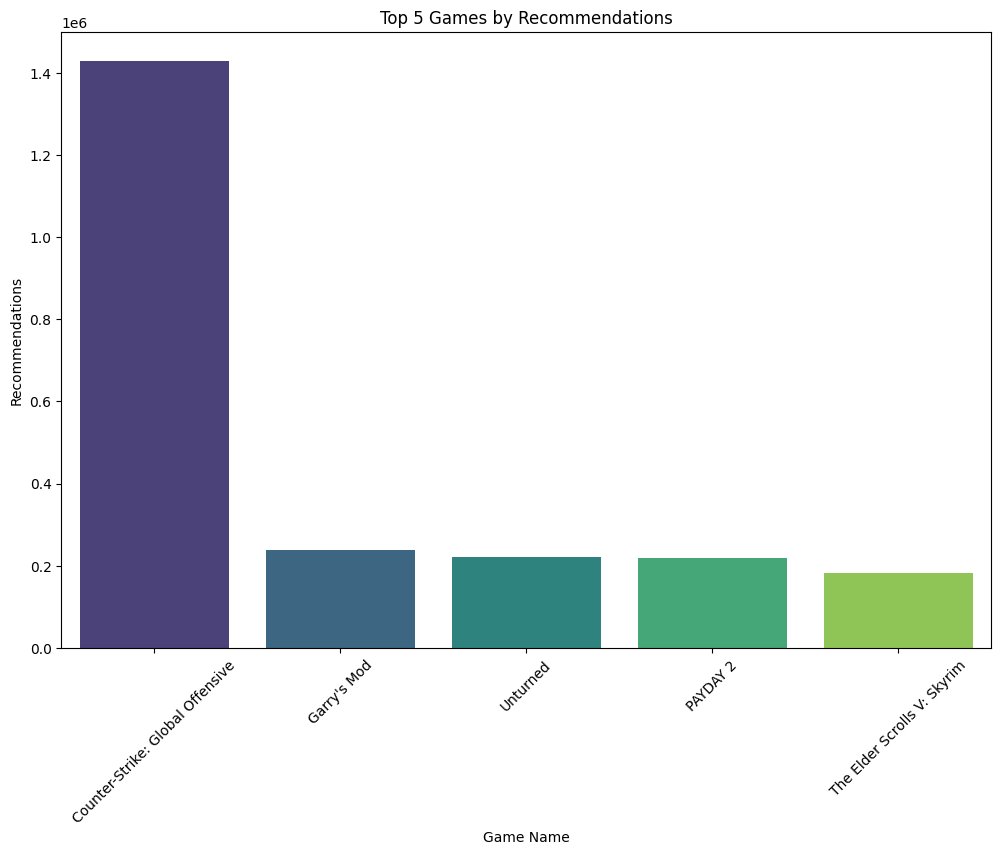

C:\Users\extra\AppData\Local\Temp\ipykernel_12276\2592615476.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QueryName', y='Price', data=top_5_price, palette='viridis')


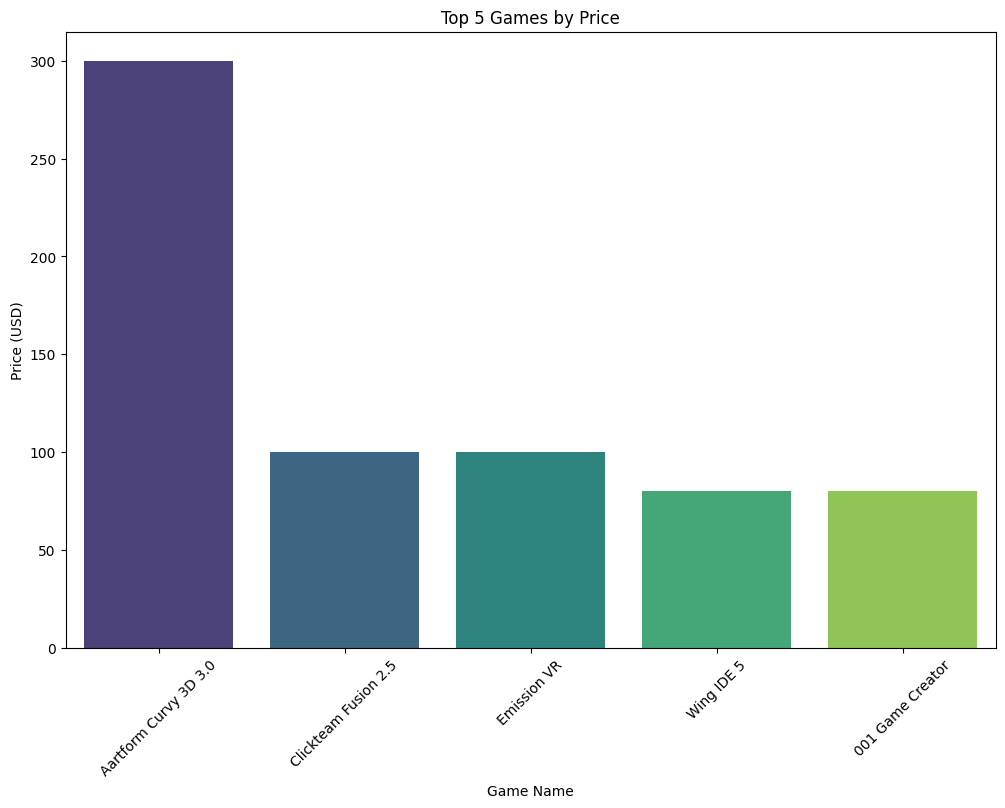

C:\Users\extra\AppData\Local\Temp\ipykernel_12276\2592615476.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QueryName', y='rating', data=top_5_ratings, palette='viridis')


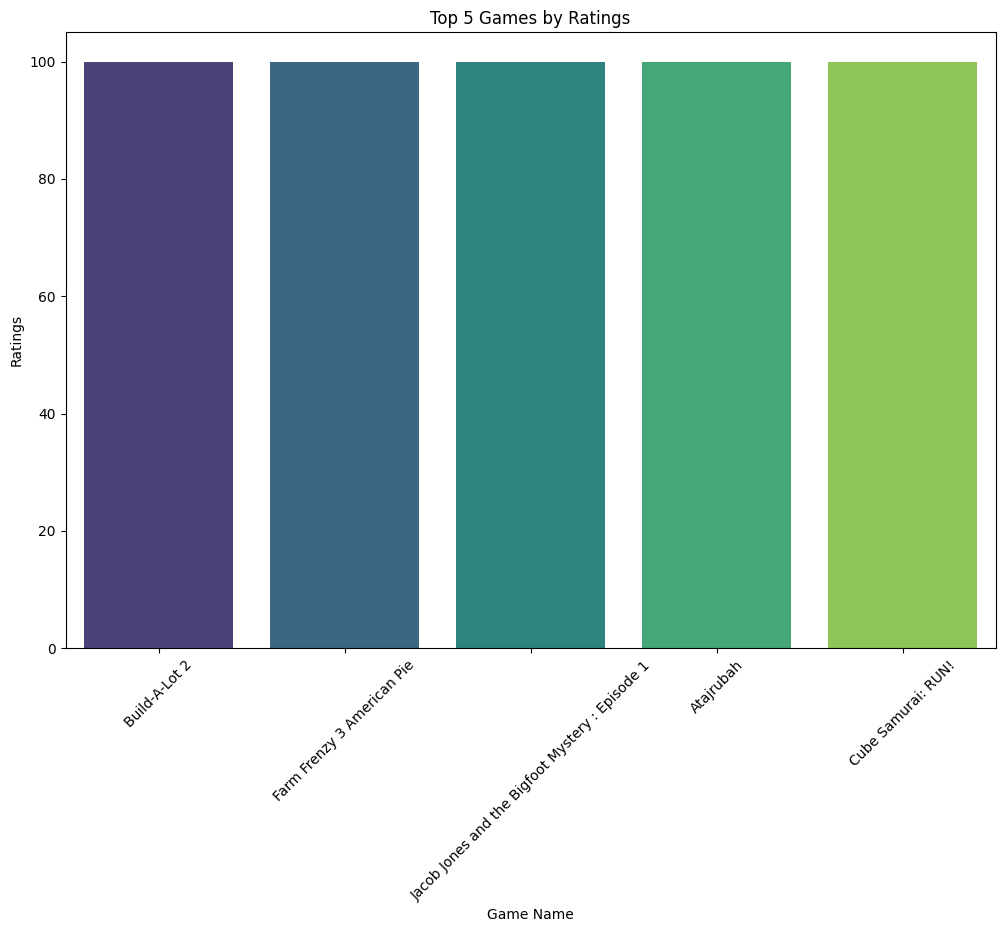

In [42]:
top_5_recommendations = df_games.nlargest(5, 'RecommendationCount')

plt.figure(figsize=(12, 8))
sns.barplot(x='QueryName', y='RecommendationCount', data=top_5_recommendations, palette='viridis')
plt.title('Top 5 Games by Recommendations')
plt.xlabel('Game Name')
plt.ylabel('Recommendations')
plt.xticks(rotation=45)
plt.show()

top_5_price = df_games.nlargest(5, 'Price')

plt.figure(figsize=(12, 8))
sns.barplot(x='QueryName', y='Price', data=top_5_price, palette='viridis')
plt.title('Top 5 Games by Price')
plt.xlabel('Game Name')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

top_5_ratings = df_games.nlargest(5, 'rating')

plt.figure(figsize=(12, 8))
sns.barplot(x='QueryName', y='rating', data=top_5_ratings, palette='viridis')
plt.title('Top 5 Games by Ratings')
plt.xlabel('Game Name')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()


In [43]:
import altair as alt
import pandas as pd

# Sorting the DataFrame by 'Developers' column
top_5_developers = df_games.sort_values(by='Developers', ascending=False).head(5)

# Create a bar chart using Altair
chart = alt.Chart(top_5_developers).mark_bar(
    cornerRadiusTopLeft=10,  # Rounded top corners for smoother look
    cornerRadiusTopRight=10
).encode(
    x=alt.X('QueryName', sort='-y', title='Game Name'),
    y=alt.Y('rating', title='Ratings'),
    color=alt.Color('rating', scale=alt.Scale(scheme='viridis'), title='Ratings'),  # Smooth color gradient
    tooltip=['QueryName', 'Developers', 'rating']  # Add tooltips for interactivity
).properties(
    title='Top 5 Games by Developers',
    width=600,
    height=400
).configure_title(
    fontSize=20,
    anchor='start',
    font='Arial'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    labelAngle=-45  # Rotate x-axis labels for readability
)

# Display the chart
chart


alt.Chart(...)

In [44]:
import altair as alt
import pandas as pd

# Sample DataFrame (replace this with your actual df_games)
# df_games should contain 'Sales', 'PlayTime', and 'QueryName' columns
# df_games = pd.read_csv('your_data.csv')

# Example DataFrame creation (for demonstration)
# df_games = pd.DataFrame({
#     'Sales': [100, 200, 300, 400, 500, 600, 700],
#     'PlayTime': [10, 20, 30, 40, 50, 60, 70],
#     'QueryName': ['Game A', 'Game B', 'Game C', 'Game D', 'Game E', 'Game F', 'Game G']
# })

# Get the top 5 games based on Sales
top_n = 5
top_games = df_games.nlargest(top_n, 'Sales')

# Create a scatter plot of Sales vs. PlayTime
scatter_chart = alt.Chart(top_games).mark_circle(size=60, opacity=0.7).encode(
    x=alt.X('avg_playtime', title='Play Time (Hours)'),
    y=alt.Y('Sales', title='Sales (USD)'),
    tooltip=['QueryName', 'Sales', 'avg_playtime'],  # Tooltip for interactivity
    color=alt.Color('Sales', scale=alt.Scale(scheme='viridis'), title='Sales')  # Color based on sales
).properties(
    title=f'Top {top_n} Games by Sales vs. Play Time',
    width=600,
    height=400
)

# Create a smooth regression line
line_chart = scatter_chart.transform_regression('avg_playtime', 'Sales').mark_line(color='red', strokeWidth=2)

# Combine the scatter and line charts
final_chart = scatter_chart + line_chart

# Display the combined chart
final_chart


alt.LayerChart(...)

In [45]:
free_games= df_games[["QueryName","rating"]][df_games['Price'] == 0]

In [46]:
best_free_game = free_games.nlargest(10, 'rating')
best_free_game

,QueryName,rating
3283,Atajrubah,100.000000
7363,Reiner Knizia's The Confrontation,100.000000
8815,LILT,100.000000
9891,K Station,100.000000
12086,Hat Trick Header,100.000000
12769,Garden Wars,100.000000
7846,Princess Remedy in a World of Hurt,97.792023
8355,Iron Snout,97.746495
2734,Neighbours from Hell,97.598566
5625,Eternal Senia,97.569825


In [47]:
price_games= df_games[["QueryName","rating"]][df_games['Price'] > 0]
best_price_game = price_games.nlargest(10, 'rating')
best_price_game

,QueryName,rating
861,Build-A-Lot 2,100.0
868,Farm Frenzy 3 American Pie,100.0
2849,Jacob Jones and the Bigfoot Mystery : Episode 1,100.0
4078,Cube Samurai: RUN!,100.0
4600,BEARZERKERS,100.0
4902,Icebound,100.0
4928,Goscurry,100.0
5581,Area-X,100.0
5806,Box Out!,100.0
5986,WE ARE DOOMED,100.0


In [48]:
print("AVG Of Price")
print(df_games["Price"].mean())
print("AVG Of Sales")
print(df_games["Sales"].mean())
print("AVG Of Total Reviews")
print(df_games["TotalReviews"].mean())
print("AVG Of playtime")
print(df_games["avg_playtime"].mean())

AVG Of Price
8.197600130605135
AVG Of Sales
1633790.4608097516
AVG Of Total Reviews
6248.853939921637
AVG Of playtime
11.982729741983665


In [49]:
dev_rat= df_games[["QueryName","Developers", "rating", "TotalReviews"]]
best__game = dev_rat.nlargest(5, ['rating','TotalReviews'])
best__game

,QueryName,Developers,rating,TotalReviews
8086,GTGD S3 How To Make A Game,GTGD,100.0,44.0
9739,Maze: Subject 360 Collector's Edition,Mad Head Games,100.0,40.0
4928,Goscurry,"Demigiant,Isak J Martinsson",100.0,38.0
12310,Meow-Jong Solitaire,"Pixel Barrage Entertainment, Inc.",100.0,37.0
2849,Jacob Jones and the Bigfoot Mystery : Episode 1,Lucid Games Ltd,100.0,36.0


In [50]:
df= pd.read_csv("data/GamesCleaned.csv")
df.columns

Index(['DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'PurchaseAvail',
       'CategorySinglePlayer', 'Achievements', 'Adventure', 'Casual', 'Indie',
       'RPG', 'Free To Play', 'Action', 'Strategy', 'Simulation', 'Racing',
       'Sports', 'Massively Multiplayer', 'Education', 'Violent',
       'Design & Illustration', 'Animation & Modeling', 'Co-op',
       'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available',
       'In-App Purchases', 'Multi-player', 'VR Support', 'age_ranking',
       'Price', 'dlc_count', 'rating', 'TotalReviews', 'ReviewScore', 'Sales',
       'avg_playtime', 'YearDifference', 'Month_sin', 'Month_cos',
       'balance_pos_neg'],
      dtype='object')

In [51]:
geners= df[['Action', 'Strategy', 'Simulation', 'Racing',
       'Sports', 'Massively Multiplayer', 'Education', 'Violent',
       'Design & Illustration', 'Animation & Modeling', 'Co-op',
       'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available',
       'In-App Purchases', 'Multi-player', 'VR Support']]

In [52]:
X = df[['RecommendationCount', 'TotalReviews', 'Price', 'age_ranking','Action', 'Strategy', 'Simulation', 'Racing',
       'Sports', 'Massively Multiplayer', 'Education', 'Violent',
       'Design & Illustration', 'Animation & Modeling', 'Co-op',
       'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available',
       'In-App Purchases', 'Multi-player', 'VR Support' ]]
y = df["SteamSpyOwners"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [53]:
model1=  XGBRegressor(n_estimators = 200, learning_rate= 0.08)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)



In [54]:
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.601
Root Mean Squared Error of the model : 1031619.005


In [55]:
model2= LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model2.predict(X_test)

In [57]:
r2_score2 = r2_score(y_test, y_pred)

TypeError: 'numpy.float64' object is not callable

In [ ]:
rmse2 = math.sqrt(mean_squared_error(y_test, y_pred))
# print(f"r2 score of the model : {r2_score2:.3f}")
print(f"Root Mean Squared Error of the model : {rmse2:.3f}")